# Libraries

Source: https://www.kaggle.com/ashikm96/churn-prediction-bank-data

Notebook Author: Lorik Berisha - Data Integration Specialist

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

# Data sneak peak

In [64]:
df = pd.read_csv('Churn_Modelling.csv')

In [65]:
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)

In [66]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [67]:
df.shape

(10000, 14)

In [68]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [69]:
df.columns = [x.upper() for x in df.columns]

In [70]:
df.columns

Index(['ROWNUMBER', 'CUSTOMERID', 'SURNAME', 'CREDITSCORE', 'GEOGRAPHY',
       'GENDER', 'AGE', 'TENURE', 'BALANCE', 'NUMOFPRODUCTS', 'HASCRCARD',
       'ISACTIVEMEMBER', 'ESTIMATEDSALARY', 'EXITED'],
      dtype='object')

In [71]:
df.describe()

,ROWNUMBER,CUSTOMERID,CREDITSCORE,AGE,TENURE,BALANCE,NUMOFPRODUCTS,HASCRCARD,ISACTIVEMEMBER,ESTIMATEDSALARY,EXITED
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


This dataframe seems to posess object types, meaning that there are string data present, later on these should be converted to numeric values, otherwise ML classification algorithms cannot learn them.

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ROWNUMBER        10000 non-null  int64  
 1   CUSTOMERID       10000 non-null  int64  
 2   SURNAME          10000 non-null  object 
 3   CREDITSCORE      10000 non-null  int64  
 4   GEOGRAPHY        10000 non-null  object 
 5   GENDER           10000 non-null  object 
 6   AGE              10000 non-null  int64  
 7   TENURE           10000 non-null  int64  
 8   BALANCE          10000 non-null  float64
 9   NUMOFPRODUCTS    10000 non-null  int64  
 10  HASCRCARD        10000 non-null  int64  
 11  ISACTIVEMEMBER   10000 non-null  int64  
 12  ESTIMATEDSALARY  10000 non-null  float64
 13  EXITED           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


It appears that there are no missing values, therefore ne need to treat this aspect.

In [75]:
df.isnull().sum()

ROWNUMBER          0
CUSTOMERID         0
SURNAME            0
CREDITSCORE        0
GEOGRAPHY          0
GENDER             0
AGE                0
TENURE             0
BALANCE            0
NUMOFPRODUCTS      0
HASCRCARD          0
ISACTIVEMEMBER     0
ESTIMATEDSALARY    0
EXITED             0
dtype: int64

# Data Preprocessing

Each object type series within the dataframe should be checked for unique values, in order to be converted to categorical data, if possible.

In [78]:
df.GEOGRAPHY.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [79]:
df.GEOGRAPHY.value_counts()

France     5014
Germany    2509
Spain      2477
Name: GEOGRAPHY, dtype: int64

In [80]:
pd.crosstab(df.GEOGRAPHY, df.EXITED).T.style.background_gradient(cmap='summer_r')

GEOGRAPHY,France,Germany,Spain
EXITED,,,
0,4204,1695,2064
1,810,814,413


In [81]:
france_exit_cnt = df.loc[(df.GEOGRAPHY == 'France') & (df.EXITED == 1)].ROWNUMBER.count()
france_notexit_cnt = df.loc[(df.GEOGRAPHY == 'France') & (df.EXITED == 0)].ROWNUMBER.count()

germany_exit_cnt = df.loc[(df.GEOGRAPHY == 'Germany') & (df.EXITED == 1)].ROWNUMBER.count()
germany_notexit_cnt = df.loc[(df.GEOGRAPHY == 'Germany') & (df.EXITED == 0)].ROWNUMBER.count()

spain_exit_cnt = df.loc[(df.GEOGRAPHY == 'Spain') & (df.EXITED == 1)].ROWNUMBER.count()
spain_notexit_cnt = df.loc[(df.GEOGRAPHY == 'Spain') & (df.EXITED == 0)].ROWNUMBER.count()

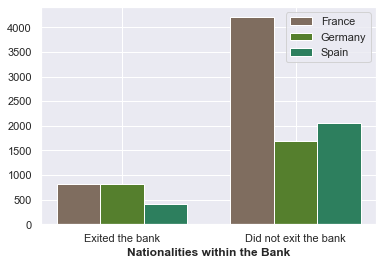

In [82]:
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [france_exit_cnt, france_notexit_cnt]
bars2 = [germany_exit_cnt, germany_notexit_cnt]
bars3 = [spain_exit_cnt, spain_notexit_cnt]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='France')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Germany')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='Spain')
 
# Add xticks on the middle of the group bars
plt.xlabel('Nationalities within the Bank', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Exited the bank', 'Did not exit the bank'])
 
# Create legend & Show graphic
plt.legend()
plt.show()


# Categorize countries into a new series

In [84]:
# France --> 0
# Germany --> 1
# Spain --> 2

df.GEOGRAPHY.replace(['France', 'Germany', 'Spain'],[0, 1, 2],inplace=True)

# Gender column analysis and categorization

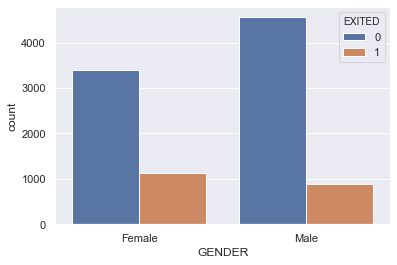

In [86]:
sns.set(style="darkgrid")
sns.countplot('GENDER', data=df, hue='EXITED')

In [87]:
# Female --> 0
# Male --> 1

df.GENDER.replace(['Female', 'Male'],[0, 1],inplace=True)

In [130]:
pd.crosstab(df.GENDER, df.EXITED).T.style.background_gradient(cmap='summer_r')

GENDER,0,1
EXITED,,
0,3404,4559
1,1139,898


# Age column analysis and categorization

In [89]:
df.AGE.describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: AGE, dtype: float64

In [90]:
#18--28 --> 0

#29--38 --> 1

#39--55 --> 2

# 55< --> 3

df.loc[(df.AGE >= 18)&(df.AGE <= 28), 'AGE'] = 0
df.loc[(df.AGE > 28)&(df.AGE <= 38), 'AGE'] = 1
df.loc[(df.AGE > 38)&(df.AGE <= 55), 'AGE'] = 2
df.loc[(df.AGE > 55), 'AGE'] = 3

In [131]:
pd.crosstab(df.AGE, df.EXITED).T.style.background_gradient(cmap='summer_r')

AGE,0,1,2,3
EXITED,,,,
0,1197,3842,2418,506
1,96,429,1218,294


# Countplot for each column in the dataframe for the sake of having a clear perspective of data categorization

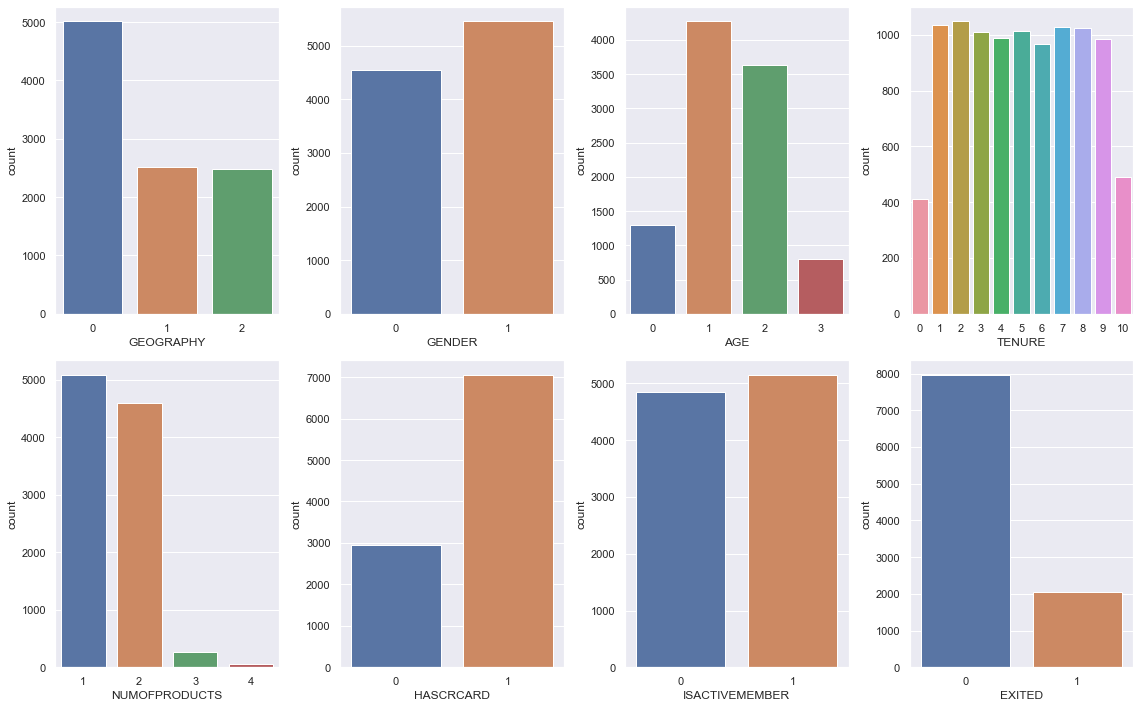

In [118]:
fig, ax = plt.subplots(2, 4, figsize= (16, 10))
sns.countplot('GEOGRAPHY',data = df, ax = ax[0][0])
sns.countplot('GENDER',data = df, ax = ax[0][1])
sns.countplot('AGE',data = df, ax = ax[0][2])
sns.countplot('TENURE',data = df, ax = ax[0][3])

sns.countplot('NUMOFPRODUCTS',data = df, ax = ax[1][0])
sns.countplot('HASCRCARD',data = df, ax = ax[1][1])
sns.countplot('ISACTIVEMEMBER',data = df, ax = ax[1][2])
sns.countplot('EXITED',data = df, ax = ax[1][3])

plt.tight_layout()

It can be observed that people for the age 38 and above were more likely to exit the bank

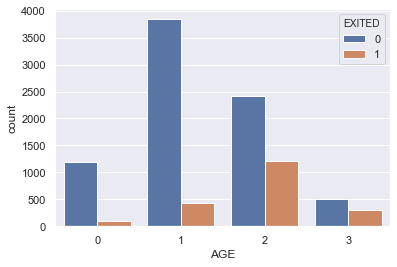

In [92]:
sns.set(style="darkgrid")
sns.countplot('AGE', data=df, hue='EXITED')

In [95]:
df.head()

,ROWNUMBER,CUSTOMERID,SURNAME,CREDITSCORE,GEOGRAPHY,GENDER,AGE,TENURE,BALANCE,NUMOFPRODUCTS,HASCRCARD,ISACTIVEMEMBER,ESTIMATEDSALARY,EXITED
0,1,15634602,Hargrave,619,0,0,2,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,2,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,2,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,2,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,2,2,125510.82,1,1,1,79084.10,0


It is evident that customers who had a credit score < 400, were more likely to exit the bank

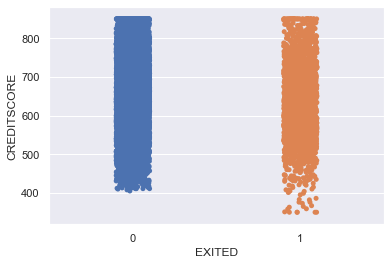

In [107]:
sns.stripplot(x="EXITED", y="CREDITSCORE", data=df)

Below it can be observed that mostly clients with only one product with bank were more likely to exit it.

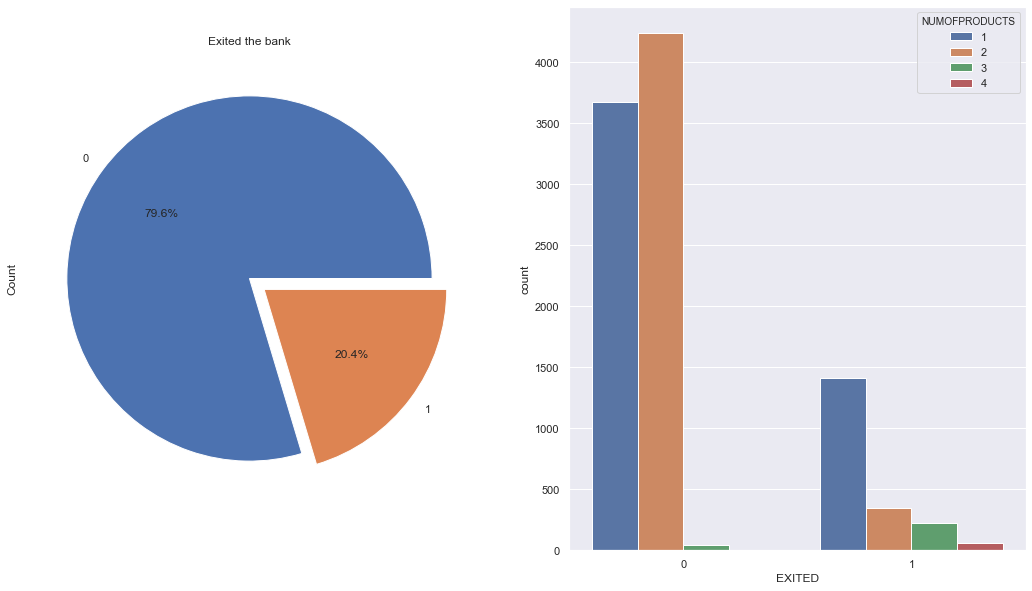

In [112]:
#Number of products per client, and whether they did exit the bank or not
f, ax = plt.subplots(1, 2, figsize=(18,10))
df.EXITED.value_counts().plot.pie(ax = ax[0], explode=[0,0.1], autopct='%1.1f%%')
ax[0].set_title("Exited the bank")
ax[0].set_ylabel("Count")
sns.countplot('EXITED', data=df, ax = ax[1], hue='NUMOFPRODUCTS')
plt.ioff()

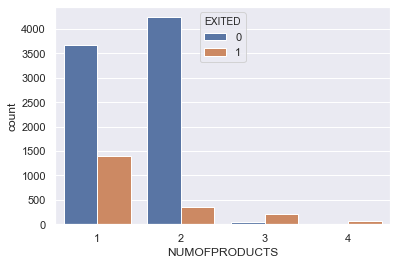

In [109]:
sns.set(style="darkgrid")
sns.countplot('NUMOFPRODUCTS', data=df, hue='EXITED')

In [132]:
pd.crosstab(df.NUMOFPRODUCTS, df.EXITED).T.style.background_gradient(cmap='summer_r')

NUMOFPRODUCTS,1,2,3,4
EXITED,,,,
0,3675,4242,46,0
1,1409,348,220,60


Inactive members were twice more likely to exit the bank

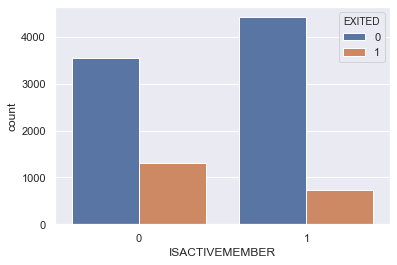

In [116]:
sns.set(style="darkgrid")
sns.countplot('ISACTIVEMEMBER', data=df, hue='EXITED')

In [133]:
pd.crosstab(df.ISACTIVEMEMBER, df.EXITED).T.style.background_gradient(cmap='summer_r')

ISACTIVEMEMBER,0,1
EXITED,,
0,3547,4416
1,1302,735


In [113]:
df.head(2)

,ROWNUMBER,CUSTOMERID,SURNAME,CREDITSCORE,GEOGRAPHY,GENDER,AGE,TENURE,BALANCE,NUMOFPRODUCTS,HASCRCARD,ISACTIVEMEMBER,ESTIMATEDSALARY,EXITED
0,1,15634602,Hargrave,619,0,0,2,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,2,1,83807.86,1,0,1,112542.58,0


# Salaries per customer and average

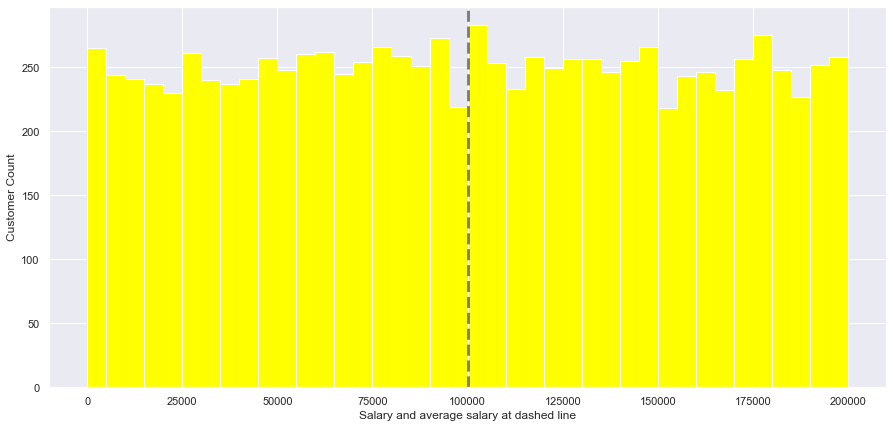

In [129]:
plt.figure(figsize=(15,7))
df.ESTIMATEDSALARY.hist(bins=40, color='yellow')
plt.axvline(df.ESTIMATEDSALARY.mean(), color='grey', linestyle='dashed', linewidth=3)
plt.xlabel("Salary and average salary at dashed line")
plt.ylabel("Customer Count")
pass

# Removal of attributes which are not relevant for classification

In [135]:
df = df.drop(['ROWNUMBER','CUSTOMERID', 'SURNAME'],axis=1);

In [138]:
df.head(2)

,CREDITSCORE,GEOGRAPHY,GENDER,AGE,TENURE,BALANCE,NUMOFPRODUCTS,HASCRCARD,ISACTIVEMEMBER,ESTIMATEDSALARY,EXITED
0,619,0,0,2,2,0.00,1,1,1,101348.88,1
1,608,2,0,2,1,83807.86,1,0,1,112542.58,0


# Correlation Matrix

It can be observed that there is no major positive or negative correlation present, based on literature values >0.75 or <-0.75 should be removed from the dataset, in our case the lowest value is a negative correlation between Balance and Number of Products per customer.

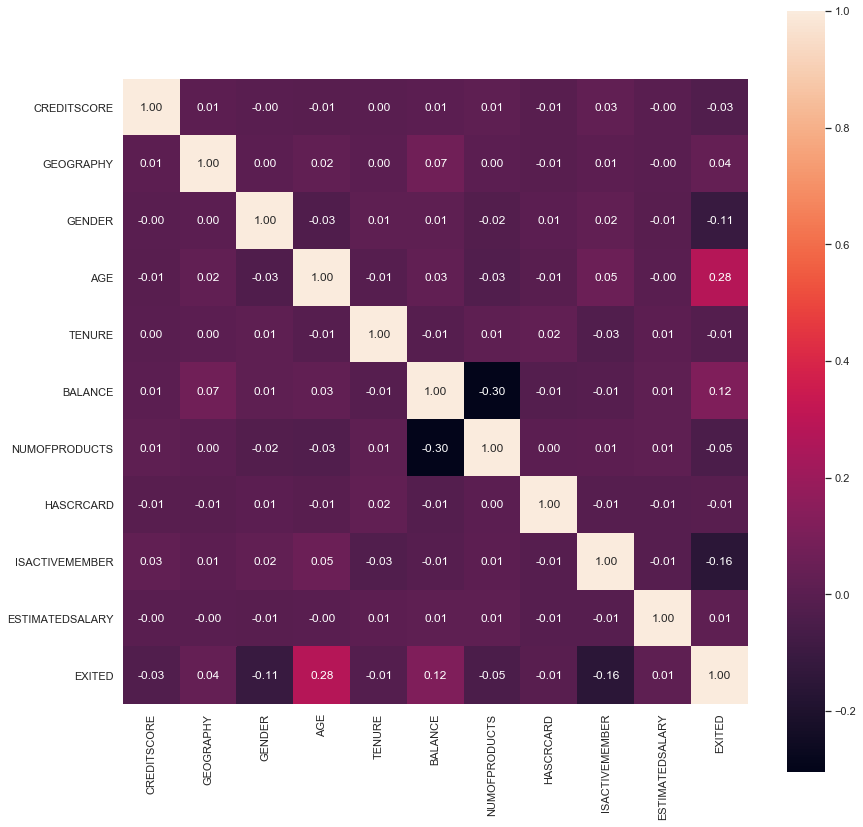

In [139]:
corr = df.corr()
fig = plt.figure(figsize = (14, 14))
sns.heatmap(corr, square = True, annot = True,fmt='.2f')
plt.show()

In [147]:
x = df.iloc[:, :-1] #all columns except the last one
y = df.iloc[:, -1] #the last column

# Feature Normalization

Normalization is very crucial for this dataset, due to the fact that there are categorical attributes with a range of values between 0 to 10 and on the other hand there are attributes which have a range of values between 0 to 200,000. In that case, for ML algorithms to properly process data, normalization should be applied to each column, so min max values are scaled in a proper range for each attribute!

In [151]:
def featureNormalization(col):
    mean = np.mean(col, axis = 0)
    std = np.std(col, axis = 0)
    
    x_norm = (col - mean)/std
    
    return x_norm, mean, std

In [152]:
x, x_mean, x_std = featureNormalization(x)

In [157]:
x.head(3)

,CREDITSCORE,GEOGRAPHY,GENDER,AGE,TENURE,BALANCE,NUMOFPRODUCTS,HASCRCARD,ISACTIVEMEMBER,ESTIMATEDSALARY
0,-0.326221,-0.901886,-1.095988,0.747022,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,1.515067,-1.095988,0.747022,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,-0.901886,-1.095988,0.747022,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687


# Train Test split

In [174]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True)

# Logistic Regression

In [175]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [176]:
y_predicted = model.predict(x_test)

0.8115

In [198]:
print('Accuracy of the model is: {:.2f}'.format(model.score(x_test, y_test)))

Accuracy of the model is: 0.81


In [177]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
print(confusion_matrix(y_predicted, y_test))

[[1551  323]
 [  54   72]]


In [178]:
#Accuracy:
print(accuracy_score(y_predicted, y_test))

#ROC Score:
print(roc_auc_score(y_predicted, y_test))

0.8115
0.6995349900899527


# KNN

In [180]:
from sklearn.neighbors import KNeighborsClassifier as knn
modeli_2 = knn().fit(x_train, y_train)
pred_2 = modeli_2.predict(x_test)

In [199]:
print('Accuracy of the model is: {:.2f}'.format(modeli_2.score(x_test, y_test)))

Accuracy of the model is: 0.81


In [182]:
print(confusion_matrix(pred_2, y_test))

[[1488  254]
 [ 117  141]]


In [183]:
knn_list = []
for i in range(1,100):
    kmodel = knn(n_neighbors=i).fit(x_train, y_train)
    pred_i = kmodel.predict(x_test)
    knn_list.append(accuracy_score(pred_i, y_test)*100)

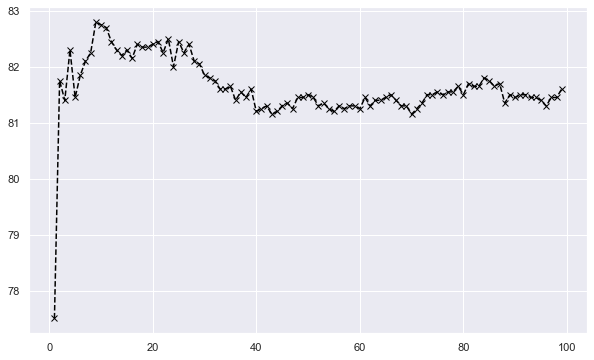

In [185]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),knn_list, color='black', linestyle='dashed',marker='x')
plt.show()

# SVC

In [186]:
from sklearn.svm import SVC 
model_3 = SVC().fit(x_train, y_train)
pred_3 = model_3.predict(x_test)

In [200]:
print('Accuracy of the model is: {:.2f}'.format(model_3.score(x_test, y_test)))

Accuracy of the model is: 0.85


In [188]:
print(confusion_matrix(pred_3, y_test))

[[1536  239]
 [  69  156]]


In [197]:
#Accuracy:
print(accuracy_score(pred_3, y_test))

#ROC Score:
print(roc_auc_score(pred_3, y_test))

0.846
0.7793427230046949


# Decision Tree

In [189]:
from sklearn.tree import DecisionTreeClassifier
model_4 = DecisionTreeClassifier().fit(x_train, y_train)
pred_4 = model_4.predict(x_test)

In [201]:
print('Accuracy of the model is: {:.2f}'.format(model_4.score(x_test, y_test)))

Accuracy of the model is: 0.80


In [191]:
print(confusion_matrix(pred_4, y_test))

[[1408  209]
 [ 197  186]]


# Score Comparison 

In [202]:
logisticregrscore = model.score(x_test, y_test)
knnscore = modeli_2.score(x_test, y_test)
svcscore = model_3.score(x_test, y_test)
dectree = model_4.score(x_test, y_test)

Text(0.5, 0.98, 'Categorical Plotting')

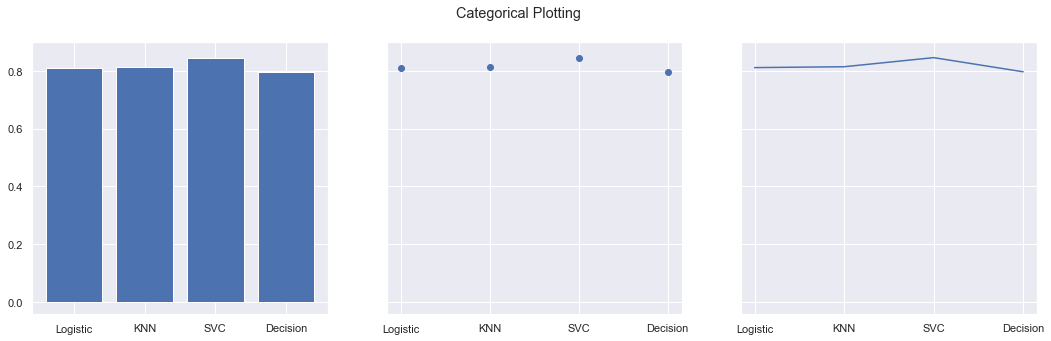

In [208]:
data = {'Logistic': logisticregrscore, 'KNN': knnscore, 'SVC': svcscore, 'Decision': dectree}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

# Confusion Matrix for each model

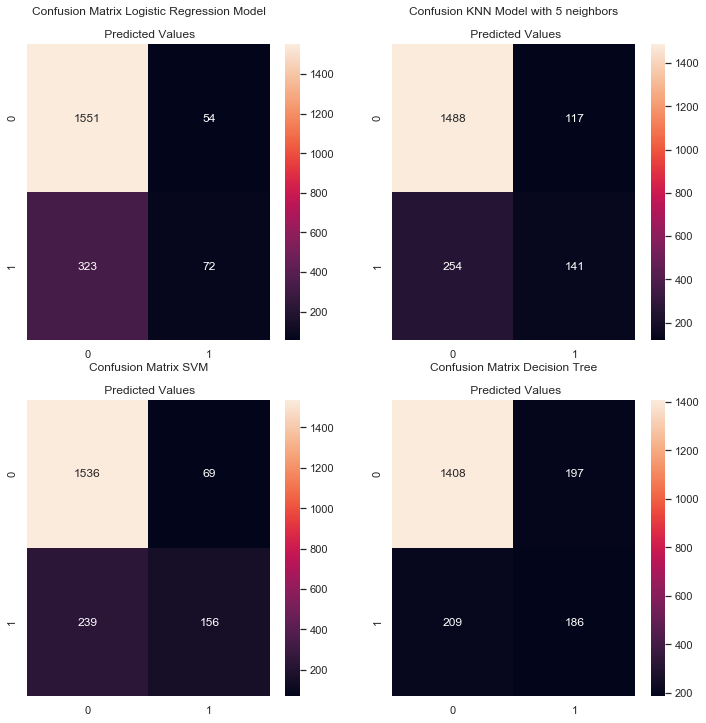

In [196]:
f, ax = plt.subplots(2,2, figsize=(12,12))
sns.heatmap(confusion_matrix(y_test, y_predicted), ax = ax[0,0], annot=True, fmt='2.0f')
ax[0,0].set_title('Confusion Matrix Logistic Regression Model\n\n Predicted Values')

sns.heatmap(confusion_matrix(y_test, pred_2), ax = ax[0,1], annot=True, fmt='2.0f')
ax[0,1].set_title('Confusion KNN Model with 5 neighbors\n\n Predicted Values')

sns.heatmap(confusion_matrix(y_test, pred_3), ax = ax[1,0], annot=True, fmt='2.0f')
ax[1,0].set_title('Confusion Matrix SVM\n\n Predicted Values')

sns.heatmap(confusion_matrix(y_test, pred_4), ax = ax[1,1], annot=True, fmt='2.0f')
ax[1,1].set_title('Confusion Matrix Decision Tree\n\n Predicted Values')

plt.show()

# K fold Cross Validation

K fold Cross Validation is a train test split technique which does not sepparate train test data in fixed format, but in chunks the whole dataset 5 times, making each chunk once a test set!

It is mainly used to avoid overfitting/underfitting, so that the model performs better with previously unseen data!

In [210]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict 

kfold = KFold(n_splits=5, shuffle=True)
accuracy = []
acc_mean = []
classifiers = ['SVC', 'DecisionTree', 'Knn', 'LogisticRegression']
models = [SVC(), DecisionTreeClassifier(), knn(n_neighbors=10), LogisticRegression()]

for model in models:
    cv_result = cross_val_score(model, x, y, cv=kfold, scoring='accuracy')
    acc_mean.append(cv_result.mean())
    
new_dataframe = pd.DataFrame({'Accuracy': acc_mean}, index=classifiers)

In [211]:
new_dataframe

,Accuracy
SVC,0.8469
DecisionTree,0.7818
Knn,0.8257
LogisticRegression,0.8088


# Model pickle export

In [212]:
from joblib import dump, load
dump(model_3, 'model_svc_bank_turnover.joblib') 

['model_svc_bank_turnover.joblib']